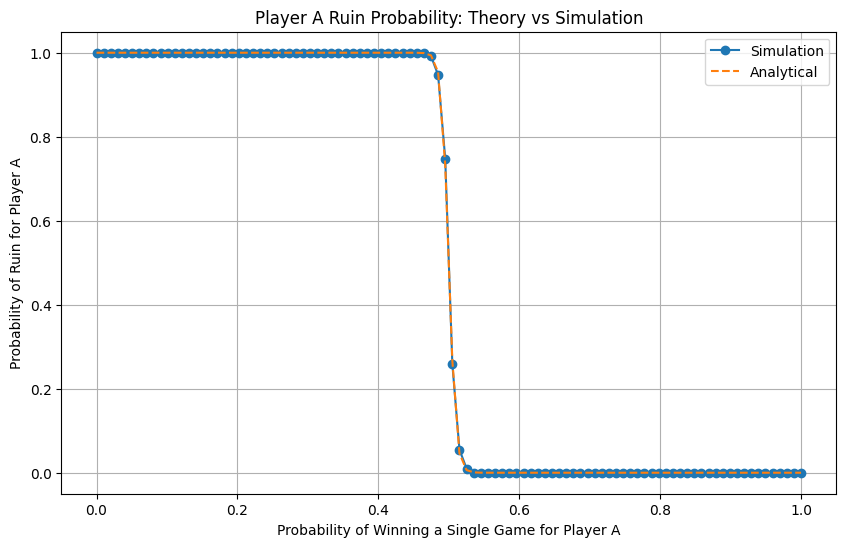

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

def player_a_ruin_analytically(a, b, p):
    if p == 0 or p == 1:
        return 1 if p == 0 else 0
    elif p == 0.5:
        return b / (a + b)
    else:
        return (1 - (p / (1 - p)) ** a) / (1 - (p / (1 - p)) ** (a + b))

def player_a_ruin_simulated(a, b, p, num_simulations=1000):
    ruins = 0

    for _ in range(num_simulations):
        capital_a, capital_b = a, b

        while capital_a > 0 and capital_b > 0:
            if random.random() < p:
                capital_a += 1
                capital_b -= 1
            else:
                capital_a -= 1
                capital_b += 1

        if capital_a == 0:
            ruins += 1

    return ruins / num_simulations

a = 50
b = 50
probabilities = np.linspace(0, 1, 100)
ruin_probabilities_analytical = [player_a_ruin_analytically(a, b, p) for p in probabilities]
ruin_probabilities_simulated = [player_a_ruin_simulated(a, b, p) for p in probabilities]

plt.figure(figsize=(10, 6))
plt.plot(probabilities, ruin_probabilities_simulated, label='Simulation', marker='o')
plt.plot(probabilities, ruin_probabilities_analytical, label='Analytical', linestyle='--')
plt.title("Player A Ruin Probability: Theory vs Simulation")
plt.xlabel("Probability of Winning a Single Game for Player A")
plt.ylabel("Probability of Ruin for Player A")
plt.legend()
plt.grid(True)
plt.show()
